## Visualization with hierarchical clustering and t-SNE

In this chapter, you'll learn about two unsupervised learning techniques for data visualization, hierarchical clustering and t-SNE. Hierarchical clustering merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy. t-SNE maps the data samples into 2d space so that the proximity of the samples to one another can be visualized.

### Hierarchical clustering of the grain data
In the video, you learned that the SciPy linkage() function performs hierarchical clustering on an array of samples. Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

     15.26  14.84   0.871  5.763  3.312  2.221   5.22
0    14.88  14.57  0.8811  5.554  3.333  1.018  4.956
1    14.29  14.09  0.9050  5.291  3.337  2.699  4.825
2    13.84  13.94  0.8955  5.324  3.379  2.259  4.805
3    16.14  14.99  0.9034  5.658  3.562  1.355  5.175
4    14.38  14.21  0.8951  5.386  3.312  2.462  4.956
..     ...    ...     ...    ...    ...    ...    ...
204  12.19  13.20  0.8783  5.137  2.981  3.631  4.870
205  11.23  12.88  0.8511  5.140  2.795  4.325  5.003
206  13.20  13.66  0.8883  5.236  3.232  8.315  5.056
207  11.84  13.21  0.8521  5.175  2.836  3.598  5.044
208  12.30  13.34  0.8684  5.243  2.974  5.637  5.063

[209 rows x 7 columns]


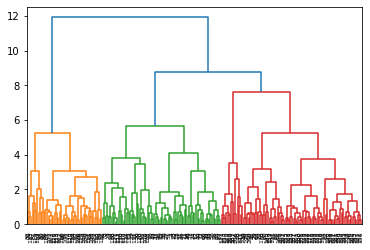

In [30]:
# load data

samples = pd.read_csv('seeds.csv')

samples = samples.iloc[:,0:7]


# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method = 'complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           leaf_rotation= 90,
           leaf_font_size= 6,
)
plt.show()


### Hierarchies of stocks
In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

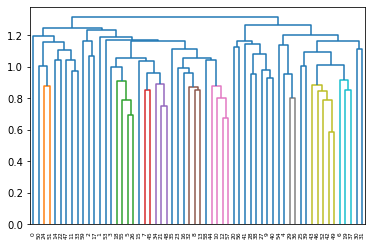

In [27]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# load data
movements = np.array(pd.read_csv('movements.csv', header=None))
stocks = pd.read_csv('Company stock price movements.csv')
companies = np.array(stocks.iloc[:, 0])

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method = 'complete')

# Plot the dendrogram
dendrogram(mergings, leaf_rotation = 90, leaf_font_size = 6) #labels = companies
plt.show()



### Different linkage, different hierarchical clustering!
Now use method 'single' in the linkage, and compare the resulting dendrogram with the last exercise. Different linkage, different hierarchical clustering!

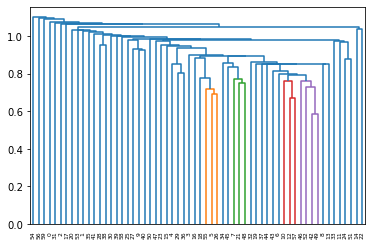

In [39]:
# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method = 'single')

# Plot the dendrogram
dendrogram(mergings, leaf_rotation = 90, leaf_font_size = 6) #labels = companies
plt.show()


### t-SNE visualization of grain dataset
In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array samples of grain samples and a list variety_numbers giving the variety number of each grain sample.

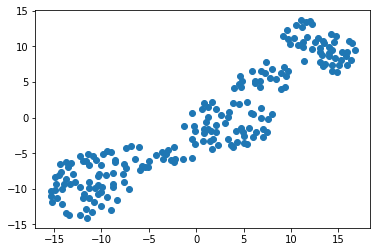

In [88]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate = 200)

# load data
samples_read = pd.read_csv('seeds.csv')
samples = np.array(samples_read.iloc[:,0:7])
variety_numbers = samples_read.iloc[:,7:8]

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys)
plt.show()

### A t-SNE map of the stock market
t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you). The list companies gives the name of each company. PyPlot (plt) has been imported for you.

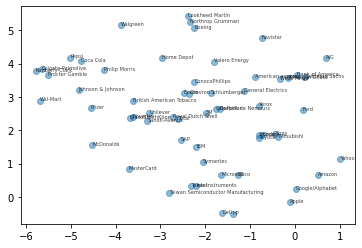

In [89]:
# load data
movements = np.array(pd.read_csv('movements.csv', header=None))
stocks = pd.read_csv('Company stock price movements.csv')
companies = np.array(stocks.iloc[:, 0])

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Create a TSNE instance: model
model = TSNE(learning_rate = 50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha = 0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()